# Final Task(insurance.csv)

In [78]:
import pandas as pd

In [80]:
df = pd.read_csv("insurance.csv")

In [81]:
# 1.불필요한 "Number"열 제거하기
df.drop(columns=["age"], inplace=True)
df.head(5)


,sex,bmi,children,smoker,region,charges
0,female,27.900,0,yes,southwest,16884.92400
1,male,33.770,1,no,southeast,1725.55230
2,male,33.000,3,no,southeast,4449.46200
3,male,22.705,0,no,northwest,21984.47061
4,male,28.880,0,no,northwest,3866.85520


In [82]:
# 2.중복 데이터 찾기 및 제거하기
# 중복된 행 찾기
duplicate_rows = df[df.duplicated()]

# 중복된 행 출력
print("중복된 행:")
print(duplicate_rows)

# 중복된 행 제거하기
df = df.drop_duplicates()

중복된 행:
      sex    bmi  children smoker     region    charges
581  male  30.59         0     no  northwest  1639.5631


In [83]:
# 3.Null 값 제거
# 각 열에 대한 null 값의 개수 확인하기
null_counts = df.isnull().sum()

# null 값이 포함된 열 출력하기
print("각 열의 null 값 개수:")
print(null_counts)

각 열의 null 값 개수:
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [84]:
# 4.rename() 이용하여 열 이름 바꾸기
# sex 열을 sex_modify 이름 바꾸기
df.rename(columns={"sex": "sex_modify"}, inplace=True)

# 변경된 열 이름을 포함한 DataFrame 출력하기
print(df.head())

  sex_modify     bmi  children smoker     region      charges
0     female  27.900         0    yes  southwest  16884.92400
1       male  33.770         1     no  southeast   1725.55230
2       male  33.000         3     no  southeast   4449.46200
3       male  22.705         0     no  northwest  21984.47061
4       male  28.880         0     no  northwest   3866.85520


In [85]:
# 5.replace() 이용하여 행 값 바꾸기
# "children" 열에서 특정 값(1)을 찾아 "1111"로 대체하기
df["children"].replace(to_replace=1, value=1111, inplace=True)

# 변경된 열 값을 포함한 DataFrame 출력하기
print(df.head())

  sex_modify     bmi  children smoker     region      charges
0     female  27.900         0    yes  southwest  16884.92400
1       male  33.770      1111     no  southeast   1725.55230
2       male  33.000         3     no  southeast   4449.46200
3       male  22.705         0     no  northwest  21984.47061
4       male  28.880         0     no  northwest   3866.85520


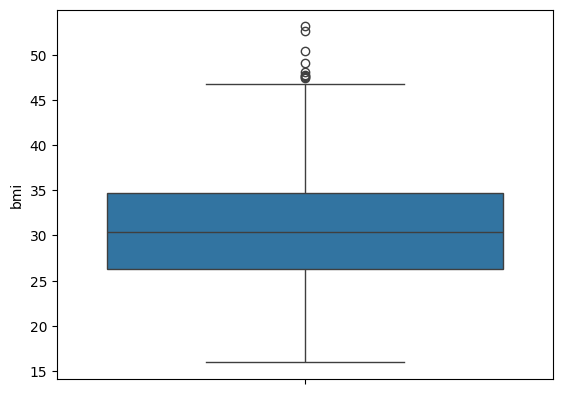

In [86]:
# 6.이상 값 처리
import seaborn as sns

sns.boxplot(y = df['bmi'] );


In [87]:
# 7.Min-Max 방법을 이용하여 데이터 정규화
from sklearn.preprocessing import MinMaxScaler
# 정규화할 열 선택 (예: 'children', 'bmi', 'charges' 열을 정규화하려면 아래 리스트에 추가)
columns_to_normalize = ["children", "bmi", "charges"]

# Min-Max 정규화 객체 생성
scaler = MinMaxScaler()

# 선택한 열에 Min-Max 정규화 적용
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# 정규화된 데이터프레임 출력
print(df.head())

  sex_modify       bmi  children smoker     region   charges
0     female  0.321227    0.0000    yes  southwest  0.251611
1       male  0.479150    1.0000     no  southeast  0.009636
2       male  0.458434    0.0027     no  southeast  0.053115
3       male  0.181464    0.0000     no  northwest  0.333010
4       male  0.347592    0.0000     no  northwest  0.043816


In [88]:
# 8.'charges' 컬럼과 상관 관계가 없는 컬럼 삭제

# 불필요한 "String"열 제거하기
df.drop(columns=["sex_modify","smoker","region"], inplace=True)
df.head(5)

# 'charges' 컬럼과의 상관 관계 계산
correlations = df.drop(columns=['charges']).corrwith(df['charges'])

# 상관 관계가 낮은 컬럼 선택 (예: 0.1 이하의 상관 관계를 갖는 컬럼을 삭제하려면 threshold 값을 조절)
threshold = 0.1
low_correlation_cols = correlations[abs(correlations) < threshold].index

# 선택한 컬럼 삭제
df.drop(columns=low_correlation_cols, inplace=True)

# 변경된 데이터프레임을 출력하거나 저장할 수 있음
print(df.head())

        bmi   charges
0  0.321227  0.251611
1  0.479150  0.009636
2  0.458434  0.053115
3  0.181464  0.333010
4  0.347592  0.043816
